### Q1. What is anomaly detection and what is its purpose?

### Ans:-key points about anomaly detection:
1. Anomaly detection is the task of identifying rare or unusual events or patterns in data.
2. It is used in various domains, such as cybersecurity, fraud detection, network intrusion detection, and predictive maintenance.
3. The goal is to distinguish normal behavior from anomalous behavior.
4. Anomaly detection can be performed using both supervised and unsupervised machine learning techniques.
5. In supervised anomaly detection, the algorithm is trained on labeled data where anomalies are known and can be identified. This approach requires a labeled dataset, which may not always be available.
6. In unsupervised anomaly detection, the algorithm must learn to identify anomalies on its own, without prior knowledge of what constitutes an anomaly. This approach is often used when labeled data is scarce or unavailable.
7. Some common techniques for unsupervised anomaly detection include clustering, density estimation, and dimensionality reduction.
8. Evaluation of anomaly detection algorithms can be challenging since anomalies are by definition rare and may be hard to find in large datasets. Various metrics such as precision, recall, and F1-score can be used to assess the performance of an anomaly detection algorithm.
9. Anomaly detection can be used as a standalone technique or as part of a larger system for detecting and responding to unusual events.

### Q2. What are the key challenges in anomaly detection?

### Ans:- There are several key challenges in anomaly detection, including:

1. Lack of labeled data: In many cases, anomalies are rare and may not be adequately represented in the available labeled data, making it difficult to train a model that can accurately detect them.

2. Imbalanced data: Anomalies are often a small fraction of the total data, resulting in imbalanced datasets. This can make it challenging to train a model that can accurately distinguish between normal and anomalous data points.

3. Concept drift: The characteristics of anomalies may change over time, which can lead to concept drift. Models that are trained on historical data may not be effective at detecting current anomalies.

4. High-dimensional data: Anomaly detection in high-dimensional data can be challenging because it may be difficult to identify relevant features and relationships between features.

5. Novelty detection: Some types of anomalies may be entirely new and not seen during training, making it difficult for a model to detect them.

6. Interpretability: Anomaly detection models can be complex, and it may be challenging to understand how they are making decisions, which can limit their practical usefulness.

### Q3. How does unsupervised anomaly detection differ from supervised anomaly detection?

### Ans:-Unsupervised Anomaly Detection is to detect previously unseen rare objects or events without any prior knowledge about these. The only information available is that the percentage of anomalies in the dataset is small, usually less than 1%.
### Supervised anomaly detection techniques require a data set that has been labeled as "normal" and "abnormal" and involves training a classifier. However, this approach is rarely used in anomaly detection due to the general unavailability of labelled data and the inherent unbalanced nature of the classes.
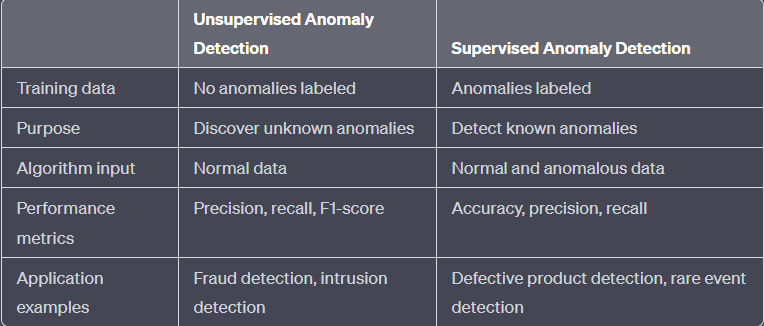

### Q4. What are the main categories of anomaly detection algorithms?

### Ans:- The main categories of anomaly detection algorithms are:

1. Statistical methods: These methods use statistical models to identify anomalies by analyzing the distribution of the data.
2. Machine learning methods: These methods use machine learning algorithms to identify anomalies by learning the patterns and relationships in the data.
3. Clustering methods: These methods group the data into clusters and identify anomalies as points that do not belong to any cluster.
4. Nearest neighbor methods: These methods identify anomalies as points that are farthest from their nearest neighbors.
5. Information theoretic methods: These methods use information theory to identify anomalies by measuring the amount of information that a data point provides.

### Q5. What are the main assumptions made by distance-based anomaly detection methods?

### Ans:-Distance-based anomaly detection methods make the following assumptions:

1. Normal instances are clustered together and form dense neighborhoods, while anomalies are isolated and far away from dense areas.
2. Normal instances are characterized by similar patterns or behaviors, while anomalies are characterized by distinct patterns or behaviors.
3. The distance between instances can be used as a measure of their similarity or dissimilarity.

### Q6. How does the LOF algorithm compute anomaly scores?

### Ans:-The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. This example shows how to use LOF for outlier detection which is the default use case of this estimator in scikit-learn. Note that when LOF is used for outlier detection it has no predict, decision_function and score_samples methods. See User Guide: for details on the difference between outlier detection and novelty detection and how to use LOF for novelty detection.

### The number of neighbors considered (parameter n_neighbors) is typically set 1) greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by samples that can potentially be local outliers. In practice, such information is generally not available, and taking n_neighbors=20 appears to work well in general.

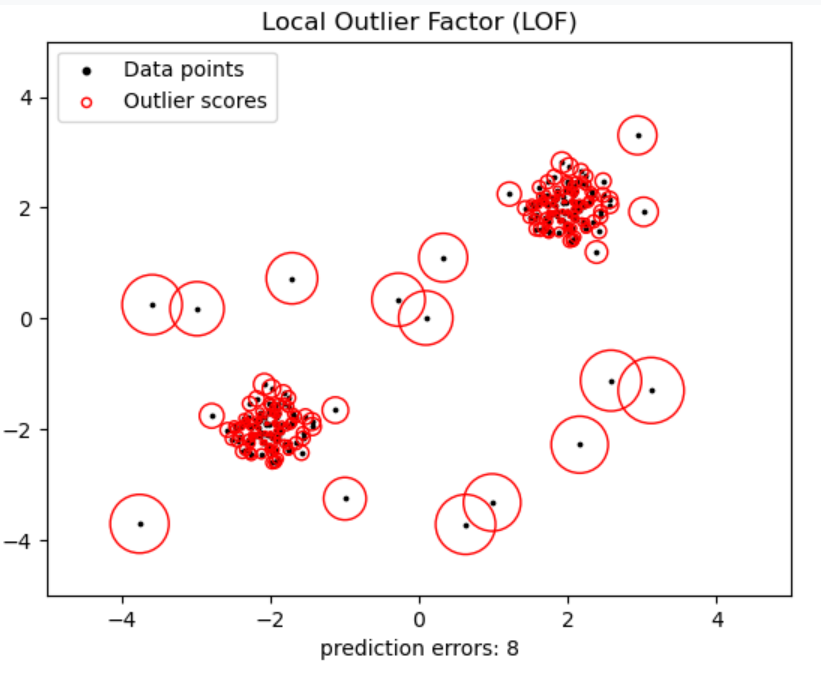


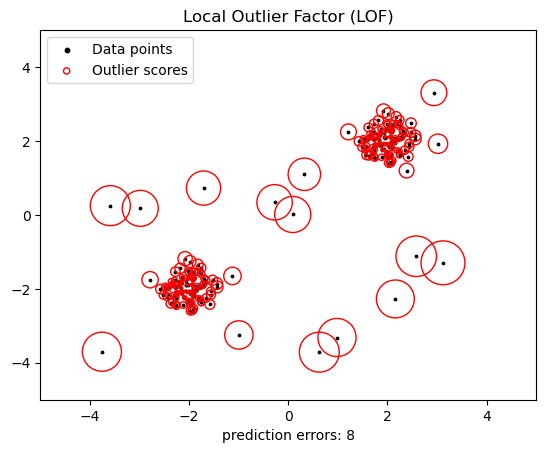

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

### Q7. What are the key parameters of the Isolation Forest algorithm?

### Ans:- The Isolation Forest algorithm has two key parameters:

1. n_estimators: the number of trees in the forest. Increasing the number of trees generally improves the performance of the algorithm, but also increases the computational cost.

2. contamination: the expected proportion of anomalies in the data. This parameter is used to determine the threshold for anomaly scores. If the contamination parameter is set to 0.1, for example, the algorithm will flag the top 10% of instances with the highest anomaly scores as anomalies. The appropriate value for this parameter depends on the problem at hand and may require some experimentation.

### Q8. If a data point has only 2 neighbours of the same class within a radius of 0.5, what is its anomaly score using KNN with K=10?

### Ans:- To calculate the anomaly score of a data point using KNN, we need to compute the average distance between the data point and its K nearest neighbors.

In this case, the data point has only 2 neighbors within a radius of 0.5. Since K=10, we need to expand the search radius until we find K=10 neighbors. Let's assume that the next 8 closest neighbors are all outside the radius of 0.5.

Then, the KNN algorithm would return 2 neighbors, both of the same class. The anomaly score of the data point would be the average distance to these 2 neighbors. We can set the distance to be the radius of the circle, which is 0.5. Therefore, the anomaly score of the data point would be:

(0.5 + 0.5) / 2 = 0.5

### So the anomaly score of the data point would be 0.5.

### Q9. Using the Isolation Forest algorithm with 100 trees and a dataset of 3000 data points, what is the anomaly score for a data point that has an average path length of 5.0 compared to the average path length of the trees?

### Ans:- The anomaly score for a data point in the Isolation Forest algorithm is calculated as follows:
1. For each tree in the forest, calculate the average path length of the data point through the tree. This is the number of edges traversed by the data point as it moves from the root of the tree to an isolated leaf node.
2. anomaly score for the data point is then calculated as the average path length across all trees in the forest, normalized by the expected average path length for a random point in the dataset.

#### In this case, we have a dataset of 3000 data points and a data point with an average path length of 5.0 compared to the average path length of the trees. We also have 100 trees in the forest.

Let's assume that the expected average path length for a random point in the dataset is around 2.0. Then, we can calculate the anomaly score for the given data point as follows:

For each tree, we calculate the average path length of the data point through the tree. Let's assume that the data point has an average path length of 5.0 for each tree.

The anomaly score for the data point is the average path length across all trees, normalized by the expected average path length for a random point in the dataset. Therefore, we have:

## anomaly score = (1/100) * sum(5.0 for each tree) / 2.0

## anomaly score = 2.5

### So, the anomaly score for the given data point is 2.5.